## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
lr = 1e-3
drp_rates = [0.1, 0.2,0.4,0.6]
epochs = 50
batch_size = 256

In [10]:

results = {}

for drp_rate in drp_rates:
  keras.backend.clear_session()
  model = build_mlp(x_train.shape[1:], drp_ratio = drp_rate)
  optimizer = keras.optimizers.Adam(lr = lr)
  
  model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
  history = model.fit(x_train, y_train, batch_size = batch_size, epochs =epochs, shuffle = True, validation_data = [x_test, y_test])
  
  name_tag = str(drp_rate)
  results[name_tag] = {
      'train_loss' : history.history['loss'],
      'valid_loss' : history.history['val_loss'],
      'train_acc' : history.history['acc'],
      'valid_acc' : history.history['val_acc']
  }

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 48s 950us/step - loss: 2.0065 - acc: 0.2666 - val_loss: 1.8652 - val_acc: 0.3247
Epoch 2/50
50000/50000 [==============================] - 38s 752us/step - loss: 1.7675 - acc: 0.3650 - val_loss: 1.6525 - val_acc: 0.4049
Epoch 3/50
50000/50000 [==============================] - 37s 749us/step - loss: 1.6981 - acc: 0.3923 - val_loss: 1.6337 - val_acc: 0.4133
Epoch 4/50
50000/50000 [==============================] - 39s 789us/step - loss: 1.6360 - acc: 0.4155 - val_loss: 1.5549 - val_acc: 0.4499
Epoch 5/50
50000/50000 [==============================] - 40s 797us/step - loss: 1.6075 - acc: 0.4244 - val_loss: 1.5390 - val_acc: 0.4475
Epoch 6/50
50000/500

50000/50000 [==============================] - 27s 531us/step - loss: 1.8462 - acc: 0.3303 - val_loss: 1.7571 - val_acc: 0.3765
Epoch 3/50
50000/50000 [==============================] - 26s 527us/step - loss: 1.7866 - acc: 0.3530 - val_loss: 1.6740 - val_acc: 0.4034
Epoch 4/50
50000/50000 [==============================] - 26s 528us/step - loss: 1.7320 - acc: 0.3758 - val_loss: 1.6437 - val_acc: 0.4169
Epoch 5/50
50000/50000 [==============================] - 27s 530us/step - loss: 1.7013 - acc: 0.3903 - val_loss: 1.6658 - val_acc: 0.4046
Epoch 6/50
50000/50000 [==============================] - 26s 520us/step - loss: 1.6733 - acc: 0.3967 - val_loss: 1.5676 - val_acc: 0.4438
Epoch 7/50
50000/50000 [==============================] - 26s 519us/step - loss: 1.6426 - acc: 0.4102 - val_loss: 1.5611 - val_acc: 0.4483
Epoch 8/50
50000/50000 [==============================] - 26s 516us/step - loss: 1.6304 - acc: 0.4133 - val_loss: 1.5617 - val_acc: 0.4421
Epoch 9/50
50000/50000 [==============

50000/50000 [==============================] - 27s 540us/step - loss: 1.8542 - acc: 0.3165 - val_loss: 1.8455 - val_acc: 0.3521
Epoch 11/50
50000/50000 [==============================] - 27s 541us/step - loss: 1.8458 - acc: 0.3223 - val_loss: 1.8215 - val_acc: 0.3567
Epoch 12/50
50000/50000 [==============================] - 28s 556us/step - loss: 1.8419 - acc: 0.3229 - val_loss: 1.8067 - val_acc: 0.3614
Epoch 13/50
50000/50000 [==============================] - 30s 598us/step - loss: 1.8391 - acc: 0.3237 - val_loss: 1.8272 - val_acc: 0.3546
Epoch 14/50
50000/50000 [==============================] - 32s 638us/step - loss: 1.8314 - acc: 0.3262 - val_loss: 1.7924 - val_acc: 0.3768
Epoch 15/50
50000/50000 [==============================] - 26s 518us/step - loss: 1.8241 - acc: 0.3291 - val_loss: 1.7818 - val_acc: 0.3756
Epoch 16/50
50000/50000 [==============================] - 27s 541us/step - loss: 1.8264 - acc: 0.3310 - val_loss: 1.7774 - val_acc: 0.3831
Epoch 17/50
50000/50000 [=======

50000/50000 [==============================] - 25s 508us/step - loss: 2.1862 - acc: 0.1579 - val_loss: 2.1470 - val_acc: 0.2120
Epoch 19/50
50000/50000 [==============================] - 27s 535us/step - loss: 2.1837 - acc: 0.1566 - val_loss: 2.1550 - val_acc: 0.1984
Epoch 20/50
50000/50000 [==============================] - 28s 564us/step - loss: 2.1822 - acc: 0.1561 - val_loss: 2.1567 - val_acc: 0.2077
Epoch 21/50
50000/50000 [==============================] - 26s 527us/step - loss: 2.1845 - acc: 0.1583 - val_loss: 2.1479 - val_acc: 0.2064
Epoch 22/50
50000/50000 [==============================] - 28s 553us/step - loss: 2.1787 - acc: 0.1592 - val_loss: 2.1524 - val_acc: 0.1947
Epoch 23/50
50000/50000 [==============================] - 27s 536us/step - loss: 2.1822 - acc: 0.1582 - val_loss: 2.1923 - val_acc: 0.1836
Epoch 24/50
50000/50000 [==============================] - 29s 590us/step - loss: 2.1829 - acc: 0.1570 - val_loss: 2.1691 - val_acc: 0.1930
Epoch 25/50
50000/50000 [=======

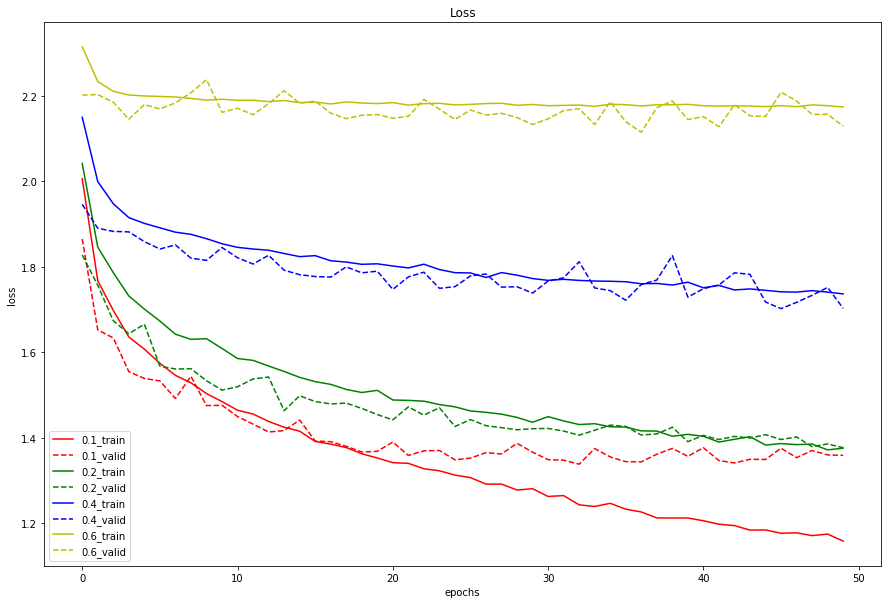

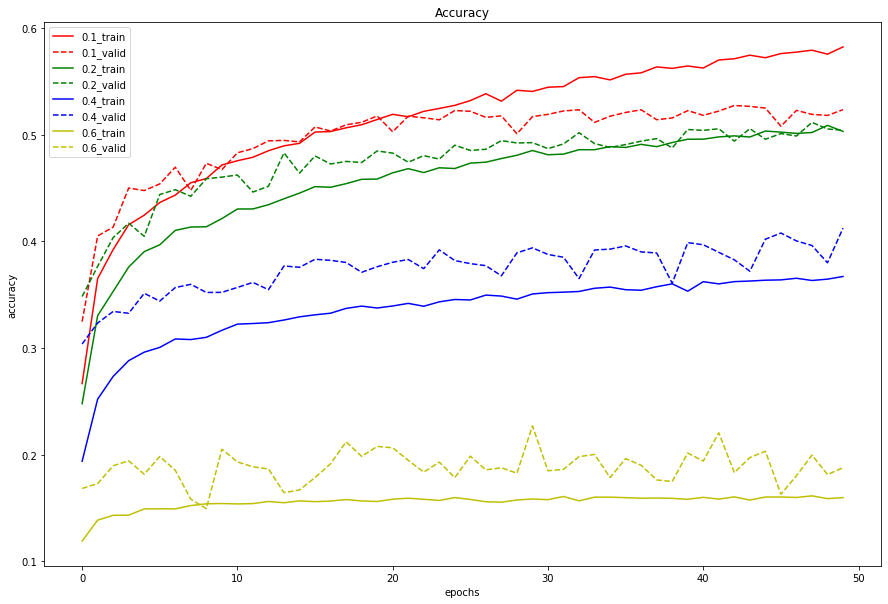

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r','g','b','y','k','m']

plt.figure(figsize = (15,10))

for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
    plt.plot(results[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize = (15,10))
for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_acc'], '-', label = cond + '_train', color = colors[i])
    plt.plot(results[cond]['valid_acc'], '--',label = cond + '_valid', color = colors[i])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()